In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import asyncio
from time import time
import os
import matplotlib.pyplot as plt
import pandas as pd

from downloader import Downloader, load_hlc_cache
from procedures import create_binance_bot_spot, create_bitget_bot, \
    prepare_backtest_config
from pure_funcs import get_template_live_config, get_dummy_settings

In [3]:
plt.rcParams["figure.figsize"] = [21, 13]
pd.set_option("display.precision", 10)

In [5]:
async def get_data(symbol_="TRBUSDT", start_date_= "2023-10-13", end_date_="2023-10-16"):

    class Args:
        def __init__(self):
            self.backtest_config_path = "configs/backtest/myconfig_v02.hjson"
            self.exchange = "bitget"
            self.symbols = symbol_
            self.market_type = "futures"
            self.user = "bitget_01"
            self.start_date = start_date_
            self.end_date = end_date_
            self.starting_balance = 1000.0
            self.starting_configs = ""
            self.base_dir = "backtests"
            self.ohlcv = "y"  # set to "n" to use 1s candles
    
    
    config = prepare_backtest_config(Args())
    
    config["adg_n_subdivisions"] = 20  # see configs/backtest/default.hjson for details
    config["inverse"] = False
    sts = time()
    if config["ohlcv"]:
        data = await load_hlc_cache(
            config["symbol"],
            config["inverse"],
            config["start_date"],
            config["end_date"],
            base_dir=config["base_dir"],
            spot=config["spot"],
            exchange=config["exchange"],
        )
        prices = data[:, 3]
        highs = data[:, 1]
        lows = data[:, 2]
        closes = data[:, 3]
    else:
        downloader = Downloader(config)
        data = await downloader.get_sampled_ticks()
        prices = data[:, 2]
        highs = data[:, 2]
        lows = data[:, 2]
        closes = data[:, 2]
    timestamps = data[:, 0]
    config["n_days"] = (timestamps[-1] - timestamps[0]) / (1000 * 60 * 60 * 24)
    
    print(f"millis to load {len(prices)} ticks {(time() - sts) * 1000:.0f}ms")
    return prices, highs, lows, closes, timestamps

In [6]:
prices, highs, lows, closes, timestamps = await get_data(symbol_="TRBUSDT", start_date_= "2023-10-13", end_date_="2023-10-16")
volatility = (highs - lows) / prices
volatility

fetching market_specific_settings for TRBUSDT...
TRBUSDT most n days of consecutive identical ohlcvs: 0.000, index last: 0
millis to load 4321 ticks 2ms


array([0.00206203, 0.00167297, 0.00110901, ..., 0.00083149, 0.00103873,
       0.00110903])

<AxesSubplot:title={'center':'Coin Price'}, xlabel='Time', ylabel='Price'>

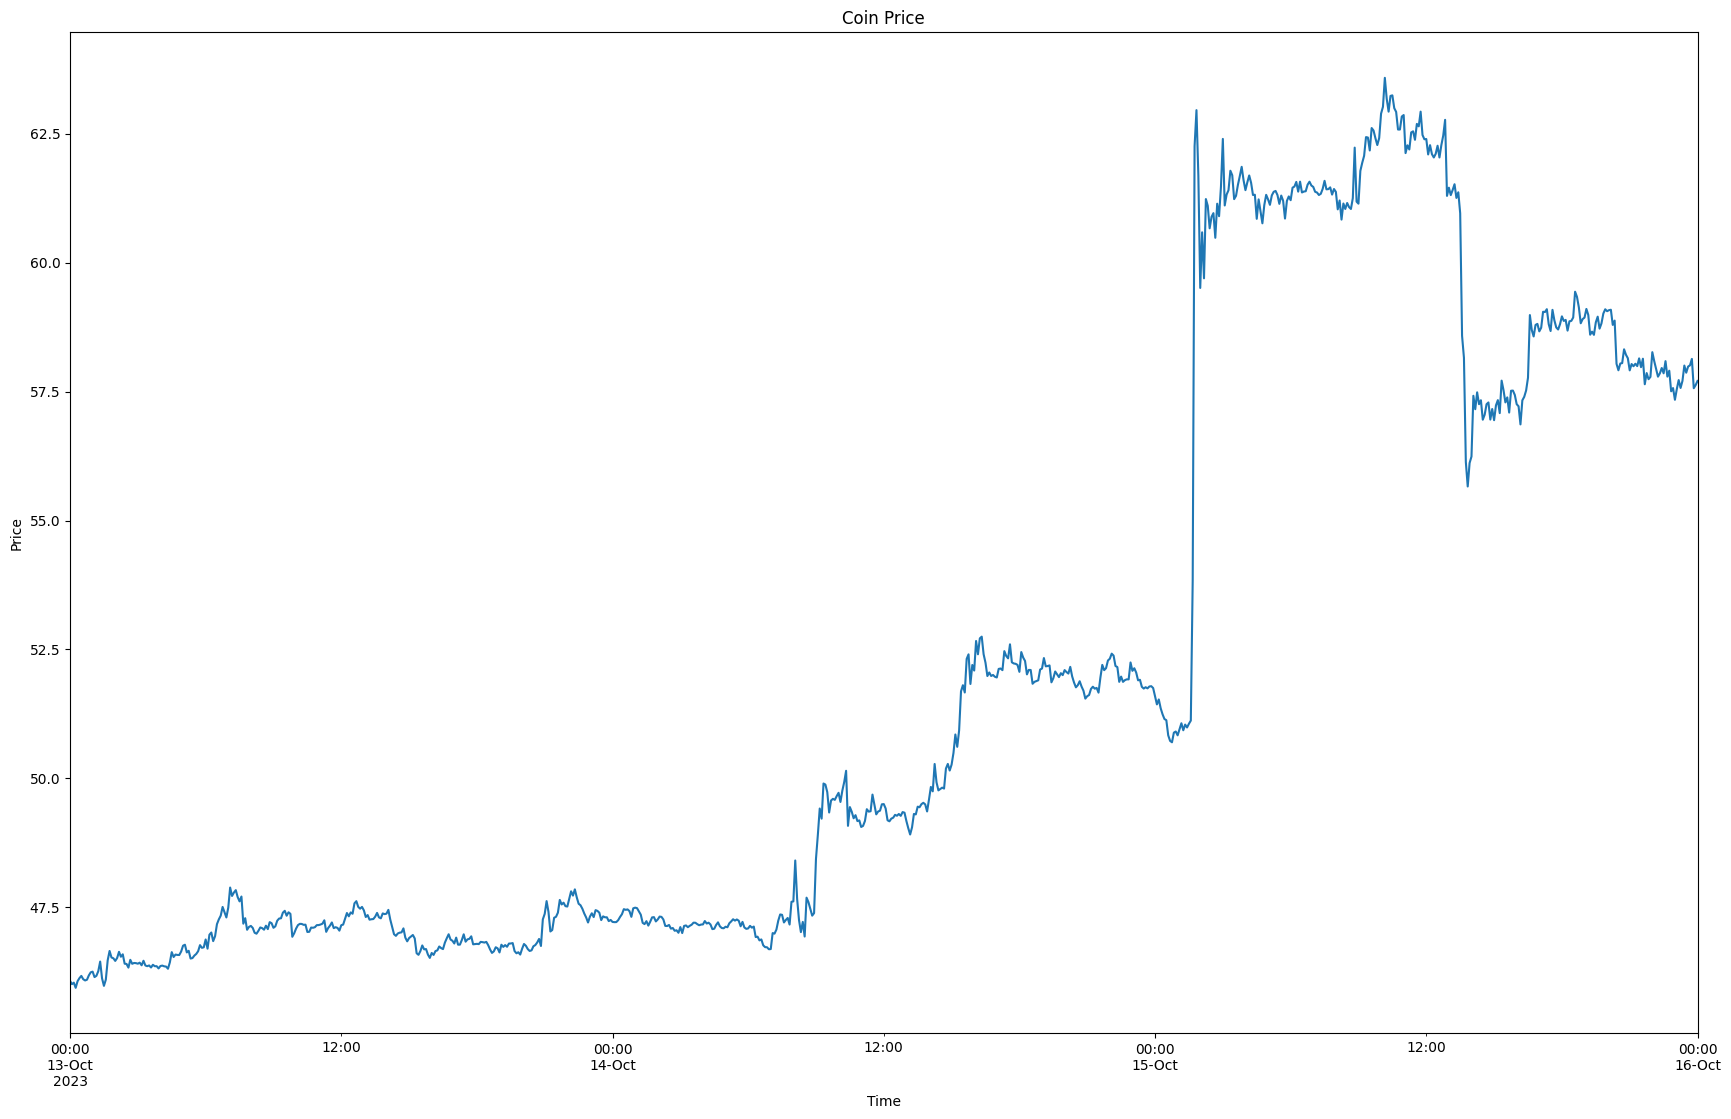

In [7]:
df = pd.DataFrame({"timestamp": timestamps, "price": prices}).set_index("timestamp")
df2 = pd.DataFrame({"timestamp": pd.to_datetime(timestamps, unit='ms'), "price": prices}).set_index("timestamp")
df2.price.iloc[::5].plot(title="Coin Price", xlabel="Time", ylabel="Price")

In [ ]:
folder_path = "/home/tdb/git/passivbot/configs/live/multisymbol/recursive_grid"

symbols = [x.split(".")[0] for x in os.listdir(folder_path)]
data_dict = {}
failed_symbols = []
for s in symbols:
    try:
        data_dict[s] = await get_data(symbol_=s, start_date_= "2021-10-13", end_date_="2024-01-08")
    except Exception as e:
        print(e)
        failed_symbols.append(s)
    
    

In [15]:
failed_symbols

['1000FLOKIUSDT',
 '1000LUNCUSDT',
 '1000PEPEUSDT',
 '1000SHIBUSDT',
 'AMBUSDT',
 'ATAUSDT',
 'BALUSDT',
 'BLUEBIRDUSDT',
 'BTCDOMUSDT',
 'BTCSTUSDT',
 'BTSUSDT',
 'CVCUSDT',
 'DEFIUSDT',
 'DGBUSDT',
 'DODOXUSDT',
 'FTTUSDT',
 'HNTUSDT',
 'NMRUSDT',
 'OXTUSDT',
 'PERPUSDT',
 'RAYUSDT',
 'SCUSDT',
 'SRMUSDT',
 'TUSDT',
 'XEMUSDT',
 'XVSUSDT']

In [25]:
data_dict.keys()

dict_keys(['1000XECUSDT', '1INCHUSDT', 'AAVEUSDT', 'ACHUSDT', 'ADAUSDT', 'AGIXUSDT', 'AGLDUSDT', 'ALGOUSDT', 'ALICEUSDT', 'ALPHAUSDT', 'ANKRUSDT', 'ANTUSDT', 'APEUSDT', 'API3USDT', 'APTUSDT', 'ARBUSDT', 'ARKMUSDT', 'ARPAUSDT', 'ARUSDT', 'ASTRUSDT', 'ATOMUSDT', 'AUDIOUSDT', 'AVAXUSDT', 'AXSUSDT', 'BAKEUSDT', 'BANDUSDT', 'BATUSDT', 'BCHUSDT', 'BELUSDT', 'BLURUSDT', 'BLZUSDT', 'BNBUSDT', 'BNTUSDT', 'BNXUSDT', 'BTCUSDT', 'C98USDT', 'CELOUSDT', 'CELRUSDT', 'CFXUSDT', 'CHRUSDT', 'CHZUSDT', 'CKBUSDT', 'COCOSUSDT', 'COMBOUSDT', 'COMPUSDT', 'COTIUSDT', 'CRVUSDT', 'CTKUSDT', 'CTSIUSDT', 'CVXUSDT', 'CYBERUSDT', 'DARUSDT', 'DASHUSDT', 'DENTUSDT', 'DOGEUSDT', 'DOTUSDT', 'DUSKUSDT', 'DYDXUSDT', 'EDUUSDT', 'EGLDUSDT', 'ENJUSDT', 'ENSUSDT', 'EOSUSDT', 'ETCUSDT', 'ETHUSDT', 'FETUSDT', 'FILUSDT', 'FLMUSDT', 'FLOWUSDT', 'FOOTBALLUSDT', 'FTMUSDT', 'FXSUSDT', 'GALAUSDT', 'GALUSDT', 'GMTUSDT', 'GMXUSDT', 'GRTUSDT', 'GTCUSDT', 'HBARUSDT', 'HFTUSDT', 'HIGHUSDT', 'HOOKUSDT', 'HOTUSDT', 'ICPUSDT', 'ICXUSDT', 'I

In [20]:
data_df = {}
for k, v in data_dict.items():
    prices, highs, lows, closes, timestamps = v
    df = pd.DataFrame(
        {
            "timestamp": pd.to_datetime(timestamps, unit='ms'),
            "price": prices,
            "highs": highs,
            "lows": lows,
            "closes": closes,
            "volatility": (highs - lows) / prices
        }
    ).set_index("timestamp")
    data_df[k] = df
    

In [47]:
s1 = data_df["COMBOUSDT"]["price"]
s2 = data_df["DOTUSDT"]["price"]
s1.corr(s2), s2.corr(s1)

(0.45533408914991447, 0.4553340891499145)

In [27]:
s2

timestamp
2021-10-13 00:00:00    35.171
2021-10-13 00:01:00    35.119
2021-10-13 00:02:00    35.218
2021-10-13 00:03:00    35.070
2021-10-13 00:04:00    34.994
                        ...  
2024-01-07 23:55:00     6.888
2024-01-07 23:56:00     6.891
2024-01-07 23:57:00     6.894
2024-01-07 23:58:00     6.895
2024-01-07 23:59:00     6.897
Name: price, Length: 1176480, dtype: float64

In [46]:
import numpy as np

s1 = pd.Series(np.arange(10)+10, index=np.arange(10))
s2 = pd.Series(np.arange(10)+np.random.randn(10)*2, index=np.arange(10)-2)
s1.corr(s2)

0.8276492918778774

In [37]:
np.random.randn(1)

array([0.2151453])

In [49]:
from string import ascii_letters
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()
corr

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,1.0000000000,-0.1074005717,-0.0864679288,0.0001312400,0.0350472814,0.0047490236,0.0282262804,0.0004217989,0.1320996173,0.0577198119,...,0.0736452673,-0.0553958898,-0.0582408626,-0.1238230779,0.0964512029,-0.0151776201,0.1727248499,0.0037912449,0.0055309961,-0.0115338710
B,-0.1074005717,1.0000000000,0.2546315241,0.0615055158,0.0435814282,-0.0780192090,0.0691331196,-0.2112781710,-0.0117964467,0.0852771600,...,0.0313146940,0.1004512961,-0.1030680835,0.0111869388,-0.0085358594,-0.0307303563,-0.0229776971,-0.0504828028,-0.0144683528,0.0787368358
C,-0.0864679288,0.2546315241,1.0000000000,-0.0336821668,-0.1274639628,0.1412230951,0.1647932114,-0.1885742633,-0.2300593165,0.1457771262,...,0.0104969979,0.0518718773,0.0847930183,0.1679758322,-0.0438058905,-0.0571245555,0.1255795503,-0.0684256920,-0.0527636056,0.0946608912
D,0.0001312400,0.0615055158,-0.0336821668,1.0000000000,0.0860538069,-0.1532116519,-0.0009629290,-0.0172823088,-0.1092828221,0.0110558603,...,-0.1369594190,-0.0618156140,0.1341121584,0.0811428711,0.1247057782,0.1949112086,-0.0169438564,-0.1169632169,0.0543149593,0.0143826506
E,0.0350472814,0.0435814282,-0.1274639628,0.0860538069,1.0000000000,-0.0071592254,0.1572239701,-0.0962543953,0.0437848812,0.0151174788,...,0.0904985341,0.0412755210,0.0761378942,0.0270206386,0.0699764486,-0.0217447201,0.1048217108,-0.0479125490,0.1204653764,0.0809796998
F,0.0047490236,-0.0780192090,0.1412230951,-0.1532116519,-0.0071592254,1.0000000000,0.0006937333,0.1770258742,0.0426531718,-0.0119920663,...,-0.0852786991,-0.0065064105,0.0457415343,-0.0786545578,0.1440032561,-0.0328063151,-0.0583461042,-0.0881440940,0.1401968953,-0.0417337106
G,0.0282262804,0.0691331196,0.1647932114,-0.0009629290,0.1572239701,0.0006937333,1.0000000000,-0.2105887151,0.0695870714,-0.0129310954,...,0.0631892736,-0.1122794879,0.1274902477,0.0828235782,0.1226123588,-0.1435355184,-0.0866157075,0.2367901581,-0.1136858918,-0.1159244651
H,0.0004217989,-0.2112781710,-0.1885742633,-0.0172823088,-0.0962543953,0.1770258742,-0.2105887151,1.0000000000,0.1214930952,0.0029679684,...,-0.0246197910,-0.0724683766,-0.0628507443,-0.0151504737,-0.0270599298,-0.0172837815,-0.0117157640,-0.1073235758,-0.1230018228,0.1060767392
I,0.1320996173,-0.0117964467,-0.2300593165,-0.1092828221,0.0437848812,0.0426531718,0.0695870714,0.1214930952,1.0000000000,-0.0257392671,...,-0.0176052119,-0.0635928725,-0.0526816824,-0.0320763087,0.0346411958,-0.0285429364,0.0014164227,0.0217565595,0.0865304523,0.1050794930
J,0.0577198119,0.0852771600,0.1457771262,0.0110558603,0.0151174788,-0.0119920663,-0.0129310954,0.0029679684,-0.0257392671,1.0000000000,...,0.0270252829,-0.0049810711,-0.1381563178,0.2587806016,0.0043665468,0.0780035695,0.0865617581,0.0053631007,-0.0260483535,0.0436380055


In [51]:
corr.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='object')

In [ ]:
from itertools import combinations

symbols_df = list(data_df.keys())
price_corr = pd.DataFrame(columns=symbols_df, index=symbols_df)
vix_corr = pd.DataFrame(columns=symbols_df, index=symbols_df)
for i, (sym1, sym2) in enumerate(list(combinations(symbols_df, 2))):
    s1 = data_df[sym1]["price"]
    s2 = data_df[sym2]["price"]
    p = s1.corr(s2)
    price_corr.at[sym1, sym2] = p
    price_corr.at[sym2, sym1] = p
    
    s1 = data_df[sym1]["volatility"]
    s2 = data_df[sym2]["volatility"]
    v = s1.corr(s2)
    vix_corr.at[sym1, sym2] = v
    vix_corr.at[sym2, sym1] = v
    # print(sym1, sym2)
    # if i > 10:
    #     break
        

In [59]:
vix_corr

,1000XECUSDT,1INCHUSDT,AAVEUSDT,ACHUSDT,ADAUSDT,AGIXUSDT,AGLDUSDT,ALGOUSDT,ALICEUSDT,ALPHAUSDT,...,XMRUSDT,XRPUSDT,XTZUSDT,XVGUSDT,YFIUSDT,YGGUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
1000XECUSDT,NaN,0.5118766588,0.5318933225,0.3284249744,0.5505123152,0.3700525537,0.3391990785,0.503006361,0.5210849635,0.4658062631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1INCHUSDT,0.5118766588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAVEUSDT,0.5318933225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACHUSDT,0.3284249744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAUSDT,0.5505123152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YGGUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZECUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZENUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZILUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
info = await bot.public_get(bot.endpoints["exchange_info"])
csvs = {}
syms = [x["symbol"] for x in info["symbols"] if x["symbol"].endswith("USDT")]
n = 7
interval = "5m"
while True:
    if not syms:
        break
    subset = syms[:n]
    syms = syms[n:]
    res = await asyncio.gather(*[bot.fetch_ohlcvs(symbol=s, interval=interval) for s in subset])
    for s, r in zip(subset, res):
        csvs[s] = pd.DataFrame(r)
    print(subset, len(syms))

KeyError: 'symbols'

In [ ]:
def correlation(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    a = x - x_mean
    b = y - y_mean
    return ((a * b).sum()) / (((a ** 2).sum() * (b ** 2).sum()) ** 0.5)

In [ ]:
n_symbols = 30
vols = [(csvs[s].volume * csvs[s].close).sum() for s in csvs]
minvol = sorted(vols)[-n_symbols]
ss = [s for s in csvs if (csvs[s].volume * csvs[s].close).sum() >= minvol]
corrs = []
corrs_dict = {}
done = set()
for s0 in sorted(ss):
    for s1 in sorted(ss):
        if s0 == s1:
            continue
        key = tuple(sorted([s0, s1]))
        if key in done:
            continue
        done.add(key)
        x = csvs[s0].close
        y = csvs[s1].close
        corr = correlation(x, y)
        print(f"\r{s0} {s1} {corr:.4f}      ", end=" ")
        corrs.append((corr,) + key)

corrs_dict = {}
corrs_dict_abs = {}
for e in corrs:
    if e[1] not in corrs_dict:
        corrs_dict[e[1]] = {e[2]: e[0]}
        corrs_dict_abs[e[1]] = {e[2]: abs(e[0])}

    else:
        corrs_dict[e[1]][e[2]] = e[0]
        corrs_dict_abs[e[1]][e[2]] = abs(e[0])

    if e[2] not in corrs_dict:
        corrs_dict[e[2]] = {e[1]: e[0]}
        corrs_dict_abs[e[2]] = {e[1]: abs(e[0])}

    else:
        corrs_dict[e[2]][e[1]] = e[0]
        corrs_dict_abs[e[2]][e[1]] = abs(e[0])

In [ ]:
# sum correlation of each symbol to every other symbol
corr_sorted = sorted([(sum(corrs_dict[s].values()), s) for s in corrs_dict])
corr_sorted

In [ ]:
# mean of all symbol
mean_prices = pd.concat([e.close / e.close.iloc[0] for e in csvs.values()], axis=1).mean(axis=1)

# compare individual symbol to mean
symbol = "SXPUSDT"
# symbol = corr_sorted[0][1]  # least correlated symbol
mean_prices.rename("mean_prices").plot()
(csvs[symbol].close / csvs[symbol].close.iloc[0]).rename(symbol).plot()
plt.legend()

In [ ]:
# compare two symbols
symbol0 = "BNBUSDT"
symbol1 = "LINKUSDT"
(csvs[symbol0].close / csvs[symbol0].close.iloc[0]).rename(symbol0).plot()
(csvs[symbol1].close / csvs[symbol1].close.iloc[0]).rename(symbol1).plot()
plt.legend()